In [1]:
import keras
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

In [ ]:
########### Load dataset {(x,y)} from multiple files #############
dataDir = "../data/"
X_data = scipy.io.loadmat(dataDir + 'phase_3rd_1200_1399.mat')['phase']

In [3]:
# method 2: datatype conversions
X_data = X_data.astype('bool')

In [4]:
X_data = np.reshape(X_data, [X_data.shape[0], X_data.shape[1], X_data.shape[2], X_data.shape[3], 1])

In [5]:
X_data.shape

(200, 101, 101, 101, 1)

In [6]:
img = X_data[5]
img.shape

(101, 101, 101, 1)

In [7]:
img = np.reshape(img, [1, img.shape[0], img.shape[1], img.shape[2], img.shape[3]])

In [8]:
img.shape

(1, 101, 101, 101, 1)

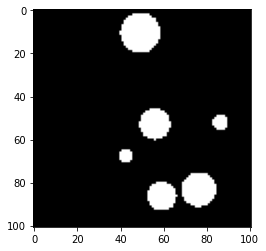

In [9]:
# plot img
fig = plt.figure()
plt.imshow(img[0, 50, :, :, 0], cmap='gray')
plt.show()

### Load Model

In [10]:
model = load_model("../saved_models/my_best_model.h5")

In [11]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	#if 'conv' not in layer.name:
	#	continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

0 conv3d_1 (None, 97, 97, 97, 16)
1 activation_1 (None, 97, 97, 97, 16)
2 max_pooling3d_1 (None, 48, 48, 48, 16)
3 conv3d_2 (None, 44, 44, 44, 16)
4 activation_2 (None, 44, 44, 44, 16)
5 max_pooling3d_2 (None, 22, 22, 22, 16)
6 conv3d_3 (None, 18, 18, 18, 32)
7 activation_3 (None, 18, 18, 18, 32)
8 max_pooling3d_3 (None, 9, 9, 9, 32)
9 flatten_1 (None, 23328)
10 dense_1 (None, 64)
11 dense_2 (None, 32)
12 dense_3 (None, 12)


In [12]:
# redefine model to output right after the first hidden layer
ixs = [0, 3, 6]
outputs = [model.layers[i+1].output for i in ixs]
model = keras.Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_1_input (InputLayer)  [(None, 101, 101, 101, 1  0        
                             )]                                  
                                                                 
 conv3d_1 (Conv3D)           (None, 97, 97, 97, 16)    2016      
                                                                 
 activation_1 (Activation)   (None, 97, 97, 97, 16)    0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 48, 48, 48, 16)   0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 44, 44, 44, 16)    32016     
                                                                 
 activation_2 (Activation)   (None, 44, 44, 44, 16)    0     

In [13]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

1/1 [==============================] - 1s 551ms/step


In [14]:
for fmap in feature_maps:
    print(fmap.shape)

(1, 97, 97, 97, 16)
(1, 44, 44, 44, 16)
(1, 18, 18, 18, 32)


In [15]:
feature_map1 = feature_maps[0]
feature_map2 = feature_maps[1]
feature_map3 = feature_maps[2]

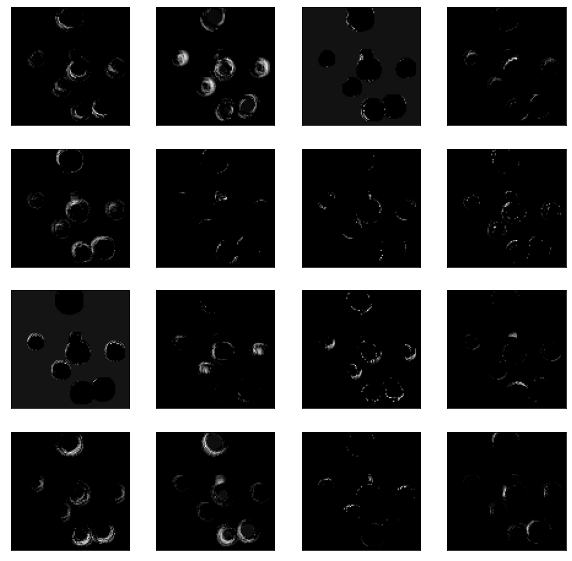

In [16]:
# plot all 16 maps in an 4*4 squares
square = 4
size = 10
ix = 1
fig, ax = plt.subplots(square, square, figsize=(size, size))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map1[0, 48, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

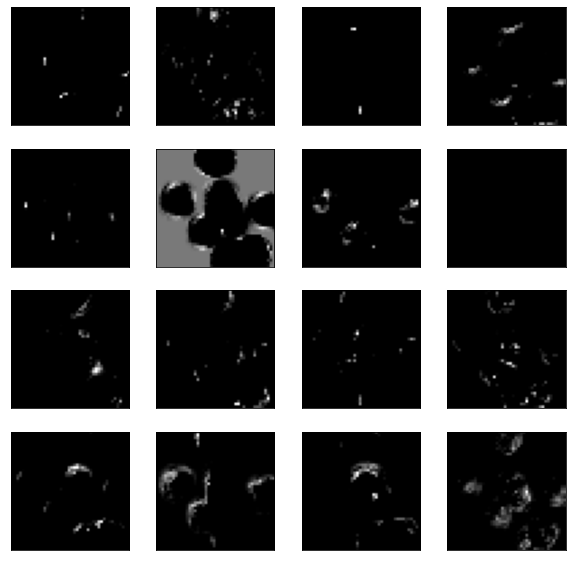

In [17]:
# plot all 16 maps in an 4*4 squares
square = 4
size = 10
ix = 1
fig, ax = plt.subplots(square, square, figsize=(size, size))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map2[0, 22, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()

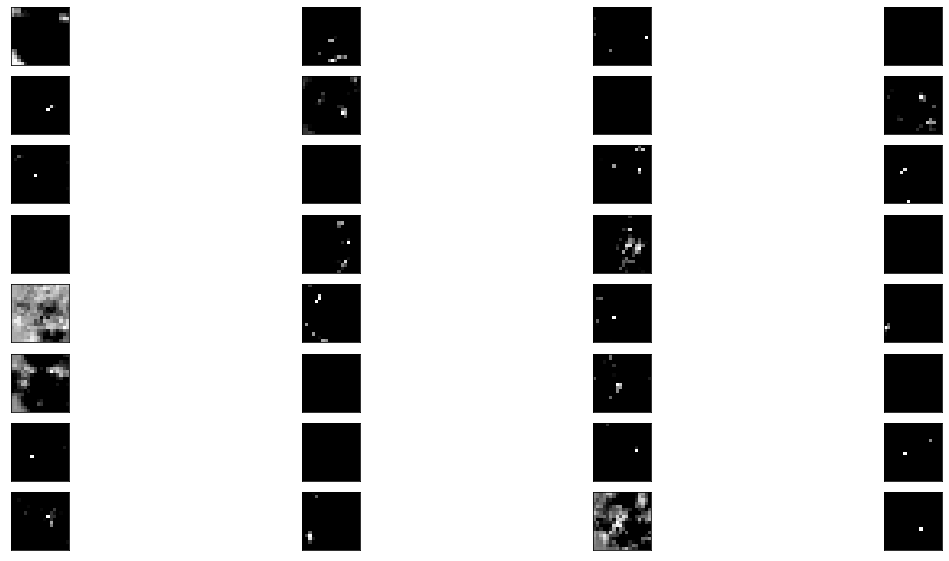

In [19]:
# plot all 16 maps in an 4*4 squares
square = 4
size = 10
ix = 1
fig, ax = plt.subplots(2*square, square, figsize=(2*size, size))
for _ in range(square):
	for _ in range(2*square):
		# specify subplot and turn of axis
		ax = plt.subplot(2*square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map3[0, 9, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.show()